<a href="https://colab.research.google.com/github/ashleyliang08/Personal-Projects-links-to-my-resume/blob/main/Scrape_App_Reviews_of_Questionai_from_Google_Play_%26_Do_Sentiment_Analysis_using_Python_%26_Focus_On_Bad_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Scrape App Reviews of Questionai from Google Play & Do Sentiment Analysis & Focus On Bad Reviews using Python**

##**Before started**

**Author**: Ashley Liang

**Purpose**: This project is for personal study only and is not used for any other purpose.

##**Import libraries**

In [56]:
!pip install -q google_play_scraper
!pip install -q transformers #for sentiment analysis
!pip install -q plotly-express #data visualization

In [57]:
import numpy as np
import pandas as pd
from google_play_scraper import app,Sort,reviews_all,reviews
import plotly.express as px

##**Scrape data**

In [58]:
# 第一次爬取2000条
result, token = reviews('com.qianfan.aihomework',lang = 'en',country = 'US',sort= Sort.NEWEST,count=2000)
# 第二次爬取额外2000条（总计4000条）
result2, token2 = reviews('com.qianfan.aihomework',lang = 'en',country = 'US',sort= Sort.NEWEST,count=2000, continuation_token=token)
# 合并数据
df = pd.DataFrame(result + result2)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bf6dbc37-402f-43dd-9f19-c01d54398e41,Oladavid motunrayo Aduragbemi,https://play-lh.googleusercontent.com/a/ACg8oc...,wow! this app is the best just download it and...,5,0,3.3.16,2025-09-26 06:13:52,None,NaT,3.3.16
1,0cb4fb65-f371-42e5-8fa1-3ee48e594fb9,Leo Moreno,https://play-lh.googleusercontent.com/a/ACg8oc...,That's really good,4,0,None,2025-09-26 03:39:04,None,NaT,None
2,e5f30c04-2c83-40ea-8372-bd4505ac530e,Paris Partynextdoor,https://play-lh.googleusercontent.com/a/ACg8oc...,you don't need to fix that app because it don'...,1,0,None,2025-09-26 02:30:13,"Thank you for your continued support, we're so...",2025-09-26 02:56:06,None
3,cb74cee5-78d4-4c9b-9394-14a30f3df00b,Julienne Mukiwa,https://play-lh.googleusercontent.com/a/ACg8oc...,good 👍🏻😊 Question,5,0,3.3.16,2025-09-25 21:04:34,None,NaT,3.3.16
4,c53f5167-6ec4-46d6-817e-9b7e5b698dca,ivy,https://play-lh.googleusercontent.com/a-/ALV-U...,★★★☆,3,0,3.3.16,2025-09-25 13:37:19,Thank you so much for your feedback. We are ha...,2025-09-26 02:56:21,3.3.16


##**Explore data**

In [59]:
df.drop(columns = ['userImage','reviewCreatedVersion'],inplace = True) #去除无关的columns

In [60]:
df.shape

(4000, 9)

In [61]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion
0,bf6dbc37-402f-43dd-9f19-c01d54398e41,Oladavid motunrayo Aduragbemi,wow! this app is the best just download it and...,5,0,2025-09-26 06:13:52,None,NaT,3.3.16
1,0cb4fb65-f371-42e5-8fa1-3ee48e594fb9,Leo Moreno,That's really good,4,0,2025-09-26 03:39:04,None,NaT,None
2,e5f30c04-2c83-40ea-8372-bd4505ac530e,Paris Partynextdoor,you don't need to fix that app because it don'...,1,0,2025-09-26 02:30:13,"Thank you for your continued support, we're so...",2025-09-26 02:56:06,None
3,cb74cee5-78d4-4c9b-9394-14a30f3df00b,Julienne Mukiwa,good 👍🏻😊 Question,5,0,2025-09-25 21:04:34,None,NaT,3.3.16
4,c53f5167-6ec4-46d6-817e-9b7e5b698dca,ivy,★★★☆,3,0,2025-09-25 13:37:19,Thank you so much for your feedback. We are ha...,2025-09-26 02:56:21,3.3.16


In [62]:
df['score'].value_counts() #distribution of ratings

,count
score,
5,2205
1,1004
4,311
3,249
2,231


In [63]:
df.rename(columns = {"reviewId":"review_id","score":"rating","thumbsUpCount":"thumbs_up","at":"review_date","replyContent":"developer_response","repliedAt":"response_date","userName":"user_name"},inplace= True)

##**Sentiment Analysis**

This is a fine-tuned checkpoint of RoBERTa-large (Liu et al. 2019).So I  apply this model directly on this project as follows.
url:https://huggingface.co/siebert/sentiment-roberta-large-english

In [64]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


**It takes around 27-28 mintutes to do sentiment analysis↓↓↓↓,so it will be a little  long though.**

In [65]:
df['content'] = df['content'].astype('str')
df['result'] = df['content'].apply(lambda x: sentiment_analysis(x))


KeyboardInterrupt: 

In [ ]:
df['sentiment'] = df['result'].apply(lambda x: (x[0]['label']))
df['sentiment'].value_counts(normalize = True) #see distribution of sentiment

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Visualize the distribution of sentiment
sentiment_counts = df['sentiment'].value_counts(normalize=True).reset_index()
sentiment_counts.columns = ['sentiment', 'percentage']

fig = px.bar(sentiment_counts, x='sentiment', y='percentage',
             title='Distribution of Sentiment in App Reviews',
             labels={'sentiment': 'Sentiment', 'percentage': 'Percentage'},
             color='sentiment',text_auto = True)
fig.update_layout(yaxis_tickformat=".1%")
fig.show()

##**Foucus on Bad Reviews(Score under 3)**

###1.筛选评分≤3的差评

In [66]:

bad_reviews = df[df['rating'] <= 3].copy()  # .copy()避免警告

print(f"共抓取{len(df)}条评论，其中差评{len(bad_reviews)}条")

共抓取4000条评论，其中差评1484条


###2.对差评进行文本处理

因为评论是英文评论，因此首先下载NLP库中的NLTK（自然语言工具包），再自定义一个预处理函数，在函数中使用NLTK来处理文本，如过滤掉非字符串（即处理缺失值），再统一大小写，接着去除每个token中的标点符号，设置停用词....最后输出3条示例以检查文本是否已经处理干净。

In [67]:

# 1. 先导入nltk并下载缺失的资源（关键步骤）
import nltk
nltk.download('punkt_tab')  # 下载新版本分词必需的资源
nltk.download('stopwords')  # 确保停用词表也已下载

# 2. 重新定义预处理函数
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    # 处理非字符串（如None、NaN），避免报错
    if not isinstance(text, str) or text.strip() == "":
        return []
    text = text.lower()  # 转小写
    text = text.translate(str.maketrans('', '', string.punctuation))  # 去标点
    tokens = word_tokenize(text)  # 现在有了punkt_tab，这里不会报错了
    stop_words = set(stopwords.words('english'))  # 英文停用词
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]  # 额外过滤1个字符的无意义词
    return filtered_tokens

# 3. 对差评执行预处理，并将其存储至新的列中
bad_reviews['processed_content'] = bad_reviews['content'].apply(preprocess_text)

# 4. 验证结果（看是否成功生成处理后的词列表）
print("预处理后的前3条差评示例：")
for idx, tokens in bad_reviews['processed_content'].head(3).items():
    print(f"评论{idx}：{tokens[:10]}...")  # 显示每个词列表的前10个词

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


预处理后的前3条差评示例：
评论2：['dont', 'need', 'fix', 'app', 'dont', 'let', 'pick', 'conversation', 'want', 'say']...
评论4：['★★★☆']...
评论5：['banyak', 'iklan', 'asu']...


###3.统计差评文本词频，输出top20个关键词

In [68]:
from collections import Counter

# 合并所有差评的预处理后单词
all_bad_words = []
for tokens in bad_reviews['processed_content']:
    all_bad_words.extend(tokens)

# 统计词频，取Top20
word_counts = Counter(all_bad_words)
print("差评中最常出现的20个关键词：")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}次")

差评中最常出现的20个关键词：
ads: 610次
app: 562次
many: 252次
answers: 237次
wrong: 228次
answer: 210次
good: 185次
question: 177次
every: 131次
ai: 131次
questions: 130次
time: 126次
like: 120次
get: 118次
dont: 113次
even: 107次
much: 105次
ad: 105次
adds: 103次
give: 101次


####3.1可视化

3.1.1.条形图

/tmp/ipython-input-1162251454.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




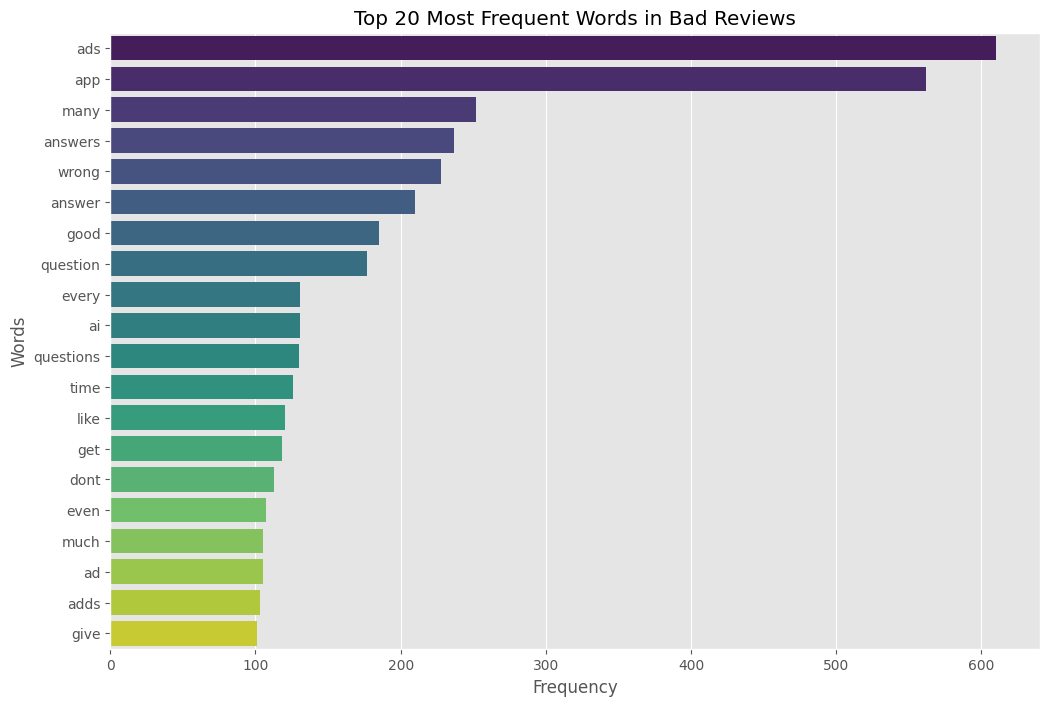

In [69]:
#可视化
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 most common words and their counts
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar chart
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Frequent Words in Bad Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

3.1.2词云图

In [70]:
!pip install seaborn
!pip install matplotlib
!pip install seaborn wordcloud

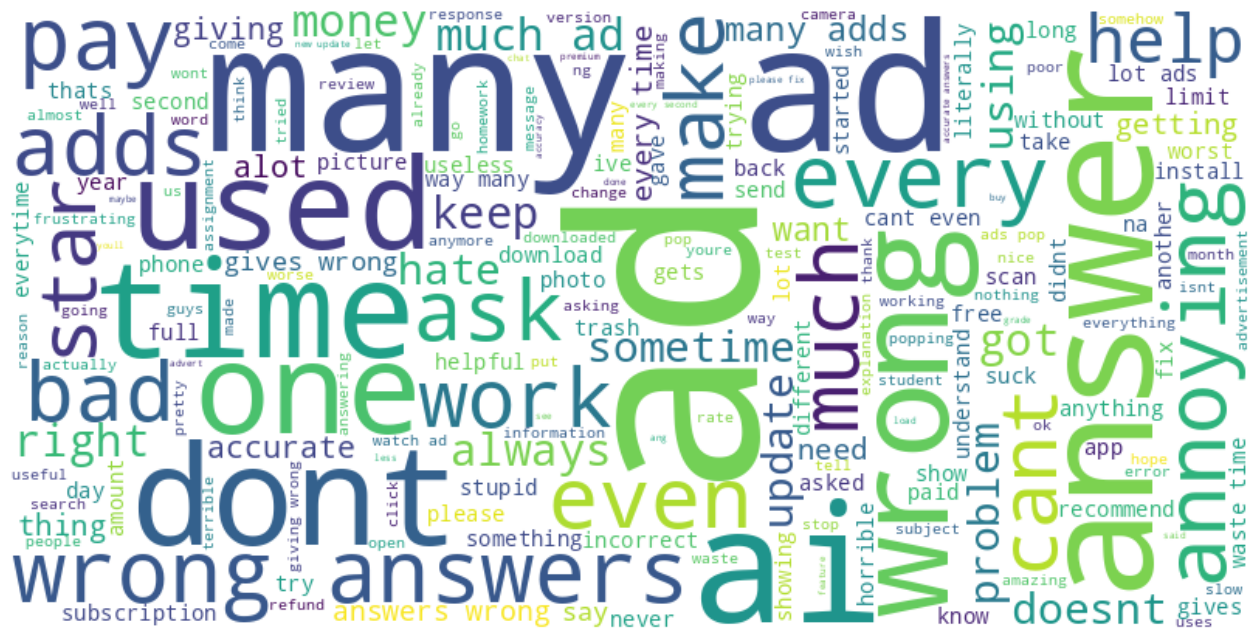

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the processed words from all bad reviews into a single string
# Filter out 'app' and 'good'
filtered_words = [word for word in all_bad_words if word not in ['app', 'good','answer','great','first','better','still'
,'question','questions','give','use','love','best','really','math','correct','add','im','theres']]
all_words_string = " ".join(filtered_words)


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_string)

# Display the word cloud
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
# 按赞同数降序排列，取Top20
top_disliked = bad_reviews.sort_values('thumbs_up', ascending=False).head(20)

print("\n获得最多用户赞同的20条差评（共性问题更明显）：")
for idx, row in top_disliked.iterrows():
    print(f"评分：{row['rating']}星 | 赞同数：{row['thumbs_up']} | 评论片段：{row['content'][:800]}...")


获得最多用户赞同的20条差评（共性问题更明显）：
评分：1星 | 赞同数：1026 | 评论片段：I used to love this app. It would help with my math homework whenever I was confused as it explained how to solve it. However, after the update, things went down. The ads show up after every scan or question I ask, 30 questions limit only?? And it now completely gives me a different problem, or my question was cut off. Such as "Find the Volume of the Polygon," and it would tell me inequalities, functions, and even bonds like the Biology bonds NOT EVEN MATH RELATED. Photomath is better than this....
评分：1星 | 赞同数：617 | 评论片段：BEWARE!!!!! At 1st this app was great until here the last couple of months I'm always having to despute the extra charge these people charge me EVERY month. I've been getting charged twice every month and when I tried to email their support team the email is not a correct domain. Not sure this app is even worth the headache anymore. Sad because it used to be great....
评分：1星 | 赞同数：456 | 评论片段：DO NOT BUY PREMIUM! before I 

翻译：
获得最多用户赞同的 20 条差评（共性问题更明显）

评分：1 星 | 赞同数：1026 | 评论片段：我以前特别喜欢这个应用。每当我做数学作业遇到困惑时，它都能帮我，还会讲解解题步骤。但更新之后，一切都变糟了。我每扫描一次题目、每问一个问题，都会弹出广告，而且居然还限制只能问 30 个问题？更离谱的是，现在它要么给我答非所问，要么就把我的问题截断。比如我问 “求多边形的体积”，它却跟我讲不等式、函数，甚至还扯到生物里的化学键 —— 这跟数学根本不沾边啊！Photomath 都比这个好用多了……

评分：1 星 | 赞同数：617 | 评论片段：大家当心！！！一开始这个应用还挺好的，但过去这几个月，这些人每个月都多收我钱，我总得去申诉。而且每个月都扣我两次费，我试着给他们的客服团队发邮件，结果发现那个邮箱域名都是错的。真不确定这个应用还值不值得我费这劲，太让人失望了，毕竟它以前明明很好用……

评分：1 星 | 赞同数：456 | 评论片段：千万别买高级会员！买会员之前，这个应用用着特别好！不管我哪里不懂，它都能准确回答还详细讲解。我买会员是为了能多用几次，结果才用了一天，所有答案全是错的，讲解也变得特别烂。我实在搞不懂，真的气炸了。12 美元全打了水漂，我要退款！什么 “准确率提升 95%”，全是骗局，别上当！

评分：1 星 | 赞同数：431 | 评论片段：这破应用太糟了，居然有 20 到 60 美元的订阅费，而且有 75% 的概率它根本答不上来问题。不光如此，几乎每道题都会弹广告。要是有人做个真正好用的 AI 应用，我肯定立马换。除非你想 99% 的概率得到错误答案，否则谁都别下这个应用。所谓的高级会员，说实话，贵得离谱，而且有时候他们还故意把原价标成 100 美元，搞得好像降价了一样……

评分：1 星 | 赞同数：416 | 评论片段：它以前特别好用，我一直用它学数学，因为答案总是对的，讲解也清晰易懂。但现在，它连我问的问题都答不上来（这种情况已经发生好多次了），而且我每次点发送按钮提交问题，都一个接一个地弹广告。这应用又慢又没用，简直是浪费时间的垃圾 AI。我真的气炸了，这 AI 纯纯浪费我时间。我讨厌它，真希望能看到改进！

评分：1 星 | 赞同数：252 | 评论片段：这应用让人失望的点有这么几个：1. “广告太多了！根本没法用，一直被烦人的广告轰炸。”2. “老是崩溃！一次使用都撑不完，要么卡住要么闪退。”3. “花钱买了高级功能，结果根本用不了！感觉被坑了。”4. “内购太多了！不花钱就没法继续用。”5. “不更新也不提供客服支持！应用卡 bug 好几个月了，开发者好像根本不在乎。”

评分：2 星 | 赞同数：212 | 评论片段：它以前挺好的，内容质量还是顶尖的，但现在每扫 2 张图就弹一次广告，太离谱了。凭什么去广告要 12 美元啊？要是没这么贵，说不定就不用放这么多广告了。我理解开发者需要赚钱维持运营，但那种长达一分钟的不可跳过广告，顶多每扫 5 张图放一次就够了，不是每 2 张就放。会员费要是定在 4 或 5 美元，肯定很多人会买。以前好长时间都没广告，现在倒好，每扫 2 张图就来个一分钟不可跳过的广告，太荒谬了……

评分：3 星 | 赞同数：178 | 评论片段：这应用其实不错，我喜欢和这个 AI 互动，尤其是它能在各方面帮我的时候。但有个问题：我给它发了个问题，它答对了，可之后我跟它说 “嗨！”，它就一直重复发之前的答案。我真的很郁闷，太烦了，有时候我喊 “别发了！！！”，它还是停不下来。我觉得你们得修复一下这个 AI，我都在考虑换其他 AI 用了，因为这个明显出问题了。补充一句：我不推荐这个应用，广告实在太多了……

评分：1 星 | 赞同数：169 | 评论片段：没完没了的广告真的超级超级烦，不过我发现把应用关掉再重新打开，广告就没了。其实我不介意看广告，但问题是它每秒都在弹啊！只要你问个问题，95% 的概率会弹出广告，而且还是同一批广告，反复播。另外，这个应用的答案经常出错！对了，现在是 2024 年 3 月 21 日，这个 AI 变得更糟了…… 完全不准！别用这个应用！

评分：3 星 | 赞同数：141 | 评论片段：这应用其实挺好的，也确实能给你答案…… 前提是它愿意正常工作的时候。每扫一次题就弹广告，而且有时候甚至扫都扫不了。我试着扫描题目时，它要加载半天，就算我把应用关掉，它还在加载，结果我想重新打开应用都难，得一直等加载界面消失。抛开广告多和反应慢的问题，它确实是个好应用，比我用过的其他同类应用更会给答案。

评分：1 星 | 赞同数：129 | 评论片段：相机功能 99% 的时间都用不了，重新打开应用也没用，得卸载了再装才能用。要是没开高级会员，它就一个劲地催你升级。广告倒不是最糟的，但特别费时间。而且遇到稍微难点的题目，这个 AI 的答案就更大概率是错的……

评分：1 星 | 赞同数：98 | 评论片段：⚠️ 警告 ⚠️ 打算装这个应用的人注意了，这应用里全是广告！你问一个问题就弹一次广告，最过分的是广告还得等 30 秒才能结束。我写这条评论的时候，正准备卸载这个诈骗应用。开发者们，你们在应用的快速反馈和准确性上做得还不错，但过多的广告真的是致命缺点。我 2025 年再来看有没有改进吧，祝好！✌️

评分：2 星 | 赞同数：78 | 评论片段：这应用本身挺好的，我喜欢它会展示解题过程。但我讨厌免费版限制提问次数，至少得多给几次吧。而且我做数学题的时候，它老是给错答案，往往得试 3、4 次才能得到正确答案。我能确定它获取的信息是对的，因为我提交的题目信息没问题。要是这个问题能解决，我肯定改成 5 星。

评分：2 星 | 赞同数：78 | 评论片段：我刚下载这个应用的时候，它还挺好的，虽然有广告，但都只有几秒钟。最近我在学预微积分，就想着用它来帮忙，结果它把我问的每道题都答错了。我让它重新回答，跟它说之前的答案是错的，它给的新答案还是错的。我已经更新过应用，也重启了设备，但它做数学题的时候，98% 的概率还是给错答案。我不推荐用它来学高等数学，不过用来学其他科目还凑合。

评分：2 星 | 赞同数：68 | 评论片段：我现在不喜欢它了。还有什么比你正在打字的时候突然弹出广告更讨厌的？他们肯定在想：“我们的应用下载量越来越多了，得多赚点钱，那就加点广告吧。” 真的太让人失望了。可能是我不懂做生意，没法理解他们的做法，但这是我的评论，我就得说实话。还有什么比看一段完全没必要的广告更烦人的呢？我才不会因为看广告，就浪费哪怕 5 秒钟的时间。

评分：1 星 | 赞同数：50 | 评论片段：你们简直是故意把应用做得更烂，就为了逼大家买订阅。我从这应用刚出来就开始用了，那时候它多好啊。现在呢，我几乎得不到正确答案，这应用差不多成废物了。刚推出的时候，它是真的有用，大部分时候都能给我正确答案。现在每问 2 个问题就弹广告，答案还大部分是错的，居然还有提问次数限制。就这么个破应用，我是绝对不会给你们钱的！

评分：3 星 | 赞同数：50 | 评论片段：它在基础数学和其他科目上表现还行，但遇到真正重要、而且本身很难解的题目时，它就帮不上忙了。我都记不清有多少次，遇到难题实在解不出来，用它查答案，结果答案最后关头出了错，导致我做题也错了。它给答案的时候，真的特别让人困惑。

评分：3 星 | 赞同数：45 | 评论片段：我给它 3 星，是因为我对这个应用有几点不满意。去年我下载它的时候，那时候还没更新，没有广告，能帮我学习，还能随时帮我做作业，效果 100% 好。但现在问题来了，广告太多了，我最近要考试，做作业的时候被这些广告搞得心烦意乱。所以我给了 3 星，希望这个问题能解决，恢复到上次更新那种无广告的状态。

评分：2 星 | 赞同数：45 | 评论片段：为什么我一提问或者发图片，就老是出错啊？而且答案出来之前，还得等一分多钟？不管我点什么，都总有广告弹出来？甚至有时候我没点，广告还会自动跳转到应用商店？拜托，把你们做的这个应用修一修行不行。其实它给的答案本来是不错的，因为每个答案都有详细的理由。但问题就出在我刚才说的这些地方……

评分：3 星 | 赞同数：43 | 评论片段：我在你们这个平台付了几个月的订阅费，结果你们突然改成 “无需订阅、无需付费” 的模式，我之前的会员权益全没了，也没给我退款。之后你们又改回付费模式，这种操作也太不地道了。因为这件事，我现在不怎么用这个应用了，而且免费版有时候是故意给错答案，逼你再花钱买会员。

##**Pain point prioritization**



In [77]:
import pandas as pd
import numpy as np

# 1. 定义痛点关键词库（基于前期提取的5大痛点）
pain_point_keywords = {
    "广告干扰": ["ads", "advertisement", "pop up", "unskippable"],
    "答案准确性": ["wrong", "incorrect", "not answer", "irrelevant"],
    "付费问题": ["premium", "charge", "subscription", "refund", "scam"],
    "功能稳定性": ["crash", "error", "slow", "not work", "loading"],
    "免费版限制": ["limited", "free version", "locked", "restrict"]
}

# 2. 计算每条差评的“痛点匹配度+共鸣权重”
def calculate_pain_score(row):
    score = 0
    # 基础分：匹配的痛点关键词数量
    for pain_point, keywords in pain_point_keywords.items():
        match_count = sum(1 for kw in keywords if kw in row["processed_content"])
        score += match_count * 2  # 每个匹配关键词加2分
    # 权重分：用户共鸣度（赞同数越高权重越大，非线性放大高赞评论影响）
    score *= np.log1p(row["thumbs_up"])  # log1p避免0值问题，突出100+赞的评论权重
    return round(score, 2)

# 3. 计算各痛点的“综合优先级得分”
bad_reviews["pain_score"] = bad_reviews.apply(calculate_pain_score, axis=1)
pain_priority = {}
for pain_point, keywords in pain_point_keywords.items():
    # 该痛点的总得分 = 所有匹配该痛点的评论得分之和
    pain_priority[pain_point] = bad_reviews[
        bad_reviews["processed_content"].apply(lambda x: any(kw in x for kw in keywords))
    ]["pain_score"].sum()

# 4. 输出优先级排序（运营可直接用于资源分配）
priority_df = pd.DataFrame({
    "痛点类型": pain_priority.keys(),
    "综合优先级得分": pain_priority.values()
}).sort_values("综合优先级得分", ascending=False)
print("痛点优先级排序（运营决策用）：")
print(priority_df)

痛点优先级排序（运营决策用）：
    痛点类型  综合优先级得分
0   广告干扰   667.53
1  答案准确性   451.05
2   付费问题   309.61
3  功能稳定性    69.38
4  免费版限制    41.64


####**Visualize Pain Point Prioritization**

In [78]:
fig = px.bar(priority_df, x='痛点类型', y='综合优先级得分',
             title='Pain Point Prioritization',
             labels={'痛点类型': 'Pain Point Type', '综合优先级得分': 'Overall Priority Score'},
             color='痛点类型',text_auto = True)
fig.show()

**广告干扰（得分 667.53）> 答案准确性（451.05）> 付费问题（309.61）。
因此建议团队先砍广告频次、再优化 AI 模型。**

####**根据差评关键词提取广告频次与强卸载率的关联**

In [169]:
def extract_ad_retention(row):
    content = row["content"].lower()
    # 1. 广告频次分级（按时间/操作间隔定义）
    ad_freq = 0  # 0=未提及广告频次
    # 极高频
    if any(kw in content for kw in ["every second", "nonstop", "every question", "every scan", "everytime","every breathe","everywhere"]):
        ad_freq = 5
    # 高频
    elif any(kw in content for kw in ["every 2", "every 3", "every 4", "every 5", "per hour", "hourly",'lots','a lot','so much','much']):
        ad_freq = 4
    # 中高频
    elif any(kw in content for kw in ["many times a day", "several times a day", "twice a day", "daily",'many']):
        ad_freq = 3
    # 中频
    elif any(kw in content for kw in ["once a day", "sometimes", "occasionally"]):
        ad_freq = 2
    # 低频
    elif any(kw in content for kw in ["once every few days", "hardly any", "no ads"]):
        ad_freq = 1

    # 2.留存意愿:按“情感强度"分类,用“正面词-中性词-负面词”差值判断
    positive_words = ["love", "like", "good", "helpful", "useful", "great", "sweet"]
    neutral_negative_words = ["annoying", "bothersome", "frustrating", "irritating"]
    strong_negative_words = ["uninstall", "delete", "never use", "sucks", "hate","worst","terrible",'used to love','changed','useless']

    pos_count = sum(1 for kw in positive_words if kw in content.lower())
    neu_neg_count = sum(1 for kw in neutral_negative_words if kw in content.lower())
    strong_neg_count = sum(1 for kw in strong_negative_words if kw in content.lower())

    # 接受
    retention = 3
    # 强卸载
    if strong_neg_count > 0:
        retention = 1
    # 犹豫
    elif neu_neg_count > 0 and pos_count == 0:
        retention = 2

    # 3. 是否提及广告
    has_ad_mention = 1 if any(kw in content for kw in ["ad", "ads", "advertisement"]) else 0
    return pd.Series([ad_freq, retention, has_ad_mention])

# 应用函数并处理数据
bad_reviews1 = bad_reviews.copy()
ad_retention_result = bad_reviews1.apply(extract_ad_retention, axis=1)
bad_reviews1[["广告频次等级", "留存意愿", "是否含广告描述"]] = ad_retention_result

#这一步筛选出明确提及ad的评论
ad_related_reviews = bad_reviews1[bad_reviews1["是否含广告描述"] == 1].copy()

# 统计结果
freq_sample_count = ad_related_reviews["广告频次等级"].value_counts().sort_index()
print("提及广告的差评中各广告频次等级的样本量：")
print(freq_sample_count)
print("-"*50)

uninstall_rate = ad_related_reviews.groupby("广告频次等级")["留存意愿"].agg(
    强卸载率=lambda x: (x==1).mean()*100, ##计算强卸载率时只关注“留存意愿 = 1"的用户,求平均值的本质是「强卸载用户数 ÷ 该分组总用户数」，即强卸载的比例。
    样本量="count"
).round(2)

print("广告频次-强卸载率对应表：")
uninstall_rate


提及广告的差评中各广告频次等级的样本量：
广告频次等级
0    360
2     14
3    210
4    137
5     63
Name: count, dtype: int64
--------------------------------------------------
广告频次-强卸载率对应表：


,强卸载率,样本量
广告频次等级,,
0,14.17,360
2,14.29,14
3,10.00,210
4,15.33,137
5,28.57,63


In [189]:
# Visualize the uninstall rate
import plotly.express as px

fig = px.bar(x=uninstall_rate.index, y=uninstall_rate['强卸载率'],
             title='Uninstall Rate by Ad Frequency Level',
             labels={'x': 'Ad Frequency Level', 'y': 'Uninstall Rate (%)'},
             text=uninstall_rate['强卸载率'].values)
fig.update_layout(width=1300, height=600, title_x=0.5, font=dict(size=14)) # Added font size here
fig.show()

阈值建议：广告频次≤3 级时，强卸载率≤15%，用户可接受；广告频次达到，卸载风险飙升至28.57%，需紧急优化。